In [59]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Reader, Dataset, accuracy, SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise.model_selection import KFold, cross_validate, train_test_split
%matplotlib inline
warnings.filterwarnings('ignore')

In [60]:
ratingsCsv = pd.read_csv(r'/home/hugo/Data-Science-Project/Data Science/ratings.csv', sep=',',header=0, names=['userId','movieId','rating','timestamp'])
ratingsCsv.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [61]:
movieTitles = pd.read_csv(r'/home/hugo/Data-Science-Project/Data Science/movies.csv', header=0)
movieTitles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [62]:
ratingsCsv = pd.merge(ratingsCsv, movieTitles, on='movieId')
ratingsCsv.head(1000)
#ratingsCsv.describe()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
995,374,110,5.0,849089153,Braveheart (1995),Action|Drama|War
996,376,110,3.5,1364993995,Braveheart (1995),Action|Drama|War
997,379,110,5.0,847397381,Braveheart (1995),Action|Drama|War
998,380,110,4.0,1493419805,Braveheart (1995),Action|Drama|War


In [63]:
ratingsCsv.head(1000)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
995,374,110,5.0,849089153,Braveheart (1995),Action|Drama|War
996,376,110,3.5,1364993995,Braveheart (1995),Action|Drama|War
997,379,110,5.0,847397381,Braveheart (1995),Action|Drama|War
998,380,110,4.0,1493419805,Braveheart (1995),Action|Drama|War


In [64]:
ratings = pd.DataFrame(ratingsCsv.groupby(['title'])['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [65]:
ratings['number_of_ratings'] = ratingsCsv.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


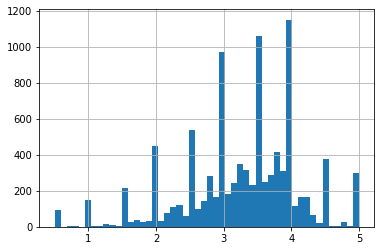

In [66]:
ratings['rating'].hist(bins=50)

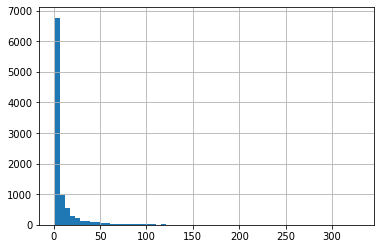

In [67]:
ratings['number_of_ratings'].hist(bins=60)

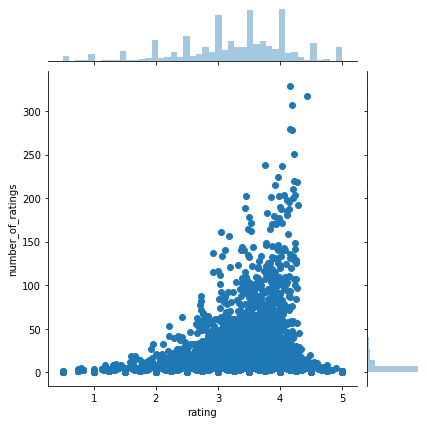

In [68]:
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)


In [69]:
movie_matrix = ratingsCsv.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)


,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [71]:
toyStoryRating = movie_matrix['Pulp Fiction (1994)']

In [72]:
toyStoryRating.tail()

userId
606    5.0
607    3.0
608    5.0
609    4.0
610    5.0
Name: Pulp Fiction (1994), dtype: float64

In [73]:
correlationToyStory = movie_matrix.corrwith(toyStoryRating)


In [74]:
correlationToyStory.head()


title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [75]:
corr_Toy = pd.DataFrame(correlationToyStory, columns=['correlation'])
corr_Toy.dropna(inplace=True)
corr_Toy.head()

,correlation
title,
"'burbs, The (1989)",-0.187323
(500) Days of Summer (2009),-0.044034
*batteries not included (1987),-0.738549
...And Justice for All (1979),-0.188982
10 Cent Pistol (2015),1.000000


In [76]:
corr_Toy = corr_Toy.join(ratings['number_of_ratings'])
corr_Toy.head()
corr_Toy[corr_Toy['number_of_ratings'] > 50].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Pulp Fiction (1994),1.000000,307
"Wolf of Wall Street, The (2013)",0.579915,54
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Interstellar (2014),0.503411,73
True Romance (1993),0.484209,65
"Blair Witch Project, The (1999)",0.468343,64
Requiem for a Dream (2000),0.463093,96
Brazil (1985),0.462131,59


In [77]:
#Usando generos para melhorar sugestão

In [78]:
ratingsCsv.head(1000)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
995,374,110,5.0,849089153,Braveheart (1995),Action|Drama|War
996,376,110,3.5,1364993995,Braveheart (1995),Action|Drama|War
997,379,110,5.0,847397381,Braveheart (1995),Action|Drama|War
998,380,110,4.0,1493419805,Braveheart (1995),Action|Drama|War


In [79]:
recomendations = corr_Toy[corr_Toy['number_of_ratings'] > 50].sort_values(by='correlation', ascending=False)
recomendations.head()

,correlation,number_of_ratings
title,,
Pulp Fiction (1994),1.000000,307
"Wolf of Wall Street, The (2013)",0.579915,54
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Interstellar (2014),0.503411,73


In [80]:
recomendations.describe()

,correlation,number_of_ratings
count,437.000000,437.000000
mean,0.077208,93.162471
std,0.182897,46.196366
min,-0.402530,51.000000
25%,-0.051788,61.000000
50%,0.079640,77.000000
75%,0.189543,109.000000
max,1.000000,329.000000


In [81]:
recomendations = pd.merge(recomendations, movieTitles, on='title')
recomendations.describe()


,correlation,number_of_ratings,movieId
count,438.000000,438.000000,438.000000
mean,0.077436,93.068493,10788.335616
std,0.182750,46.185378,22644.909198
min,-0.402530,51.000000,1.000000
25%,-0.051696,60.250000,733.750000
50%,0.079854,77.000000,2002.500000
75%,0.189424,109.000000,4946.250000
max,1.000000,329.000000,122904.000000


In [82]:
recomendations = recomendations.drop('movieId', axis=1)
recomendations.head()

,title,correlation,number_of_ratings,genres
0,Pulp Fiction (1994),1.000000,307,Comedy|Crime|Drama|Thriller
1,"Wolf of Wall Street, The (2013)",0.579915,54,Comedy|Crime|Drama
2,Fight Club (1999),0.543465,218,Action|Crime|Drama|Thriller
3,Kill Bill: Vol. 1 (2003),0.504147,131,Action|Crime|Thriller
4,Interstellar (2014),0.503411,73,Sci-Fi|IMAX


In [83]:
def genreCompatibility(genresSet1, genresSet2):
    #print(genresSet2)
    genresSet1 = genresSet1.strip()
    genresSet1 = genresSet1.split('|')
    #print(genresSet1)
    genresSet2 = genresSet2.strip()
    genresSet2 = genresSet2.split('|')
    compatibility = 0
    for genre in genresSet1:
        if genre in genresSet2:
            compatibility = compatibility + 1
    return compatibility
    #print(compatibility) 
        

In [84]:
def adjustCorrelation(dataframe, movieTitle):
    #print(movieTitles.loc[movieTitles['title'] == movieTitle])
    movie = movieTitles.loc[movieTitles['title'] == movieTitle]
    movieGenres = movie['genres'].values[0] 
    #genreCompatibility(movie['genres'].values[0] , 'Adventure|Animation|Children|Comedy|Fantasy')
    for index, row in dataframe.iterrows():
        cmp = genreCompatibility(movieGenres, row['genres'])
        dataframe.at[index,'correlation'] =  row['correlation'] + cmp
    
        
        

In [85]:
adjustCorrelation(recomendations, 'Pulp Fiction (1994)')


In [86]:
recomendations = recomendations.sort_values(by='correlation', ascending=False)
recomendations.head(50)

,title,correlation,number_of_ratings,genres
0,Pulp Fiction (1994),5.000000,307,Comedy|Crime|Drama|Thriller
99,Fargo (1996),4.205925,181,Comedy|Crime|Drama|Thriller
337,Bad Boys (1995),3.938797,51,Action|Comedy|Crime|Drama|Thriller
1,"Wolf of Wall Street, The (2013)",3.579915,54,Comedy|Crime|Drama
2,Fight Club (1999),3.543465,218,Action|Crime|Drama|Thriller
12,Trainspotting (1996),3.437714,102,Comedy|Crime|Drama
16,"Lock, Stock & Two Smoking Barrels (1998)",3.407869,67,Comedy|Crime|Thriller
30,Léon: The Professional (a.k.a. The Professiona...,3.347574,133,Action|Crime|Drama|Thriller
32,Get Shorty (1995),3.341688,89,Comedy|Crime|Thriller
47,"Departed, The (2006)",3.306734,107,Crime|Drama|Thriller


In [87]:
ratings = pd.DataFrame(ratingsCsv.groupby(['genres'])['title'].count())
ratings.head(120)

,title
genres,
(no genres listed),47
Action,186
Action|Adventure,555
Action|Adventure|Animation,42
Action|Adventure|Animation|Children,39
...,...
Action|Adventure|Fantasy|Thriller,72
Action|Adventure|Fantasy|War,1
Action|Adventure|Horror,1


In [88]:
#Usando a biblioteca surprise

In [89]:
reader = Reader()
ratingsCsv = ratingsCsv.drop(['title', 'genres'], axis=1)
ratingsCsv.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,5,1,4.0,847434962
2,7,1,4.5,1106635946
3,15,1,2.5,1510577970
4,17,1,4.5,1305696483


In [ ]:
benchmark = []
data = Dataset.load_from_df(ratingsCsv[['userId', 'movieId', 'rating']], reader)
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

In [ ]:
#Vamos usar o melhor algoritmo que foi o SVDpp que teve o menor erro

In [36]:
kf = KFold(n_splits=5)
data = Dataset.load_from_df(ratingsCsv[['userId', 'movieId', 'rating']], reader)

In [37]:
base_line = BaselineOnly()

In [41]:
for trainset, testset in kf.split(data):
    base_line.fit(trainset)
    predictions = base_line.test(testset)
    accuracy.rmse(predictions, verbose=True)
    accuracy.fcp(predictions, verbose=True)

Estimating biases using als...
RMSE: 0.8644
FCP:  0.6726
Estimating biases using als...
RMSE: 0.8778
FCP:  0.6767
Estimating biases using als...
RMSE: 0.8713
FCP:  0.6726
Estimating biases using als...
RMSE: 0.8742
FCP:  0.6701
Estimating biases using als...
RMSE: 0.8748
FCP:  0.6703


In [43]:
ratingsCsv[ratingsCsv['userId']==1].head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
215,1,3,4.0,964981247
267,1,6,4.0,964982224
369,1,47,5.0,964983815
572,1,50,5.0,964982931


In [44]:
#Testa com o usuario de id 1

In [45]:
base_line.predict(1,277)

Prediction(uid=1, iid=277, r_ui=None, est=4.007080549414456, details={'was_impossible': False})

In [47]:
#Testa com o usuario 1
movieTitles['estimation'] = movieTitles['movieId'].apply(lambda x: base_line.predict(1, x).est)

In [49]:
movieTitles.sort_values('estimation', ascending=False)
#Tabela  de estimativa do usuário 1

,movieId,title,genres,estimation
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,5.000000
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,4.970756
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.962020
659,858,"Godfather, The (1972)",Crime|Drama,4.956777
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.925131
...,...,...,...,...
1174,1562,Batman & Robin (1997),Action|Adventure|Fantasy|Thriller,3.239514
2029,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,3.238810
1173,1556,Speed 2: Cruise Control (1997),Action|Romance|Thriller,3.232953
1373,1882,Godzilla (1998),Action|Sci-Fi|Thriller,3.185872


In [51]:
#Testa com o usuario 2
movieTitles['estimation'] = movieTitles['movieId'].apply(lambda x: base_line.predict(5, x).est)
movieTitles.sort_values('estimation', ascending=False).head(10)

,movieId,title,genres,estimation
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.319773
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,4.192667
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.183931
659,858,"Godfather, The (1972)",Crime|Drama,4.178688
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.147043
828,1089,Reservoir Dogs (1992),Crime|Mystery|Thriller,4.143830
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.140497
899,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,4.134015
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.133834
914,1213,Goodfellas (1990),Crime|Drama,4.127589


In [52]:
movieTitles.sort_values('estimation', ascending=False).tail(10)

,movieId,title,genres,estimation
1989,2643,Superman IV: The Quest for Peace (1987),Action|Adventure|Sci-Fi,2.588909
1235,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2.572403
332,374,Richie Rich (1994),Children|Comedy,2.525619
271,312,Stuart Saves His Family (1995),Comedy,2.525398
1145,1499,Anaconda (1997),Action|Adventure|Thriller,2.472742
1174,1562,Batman & Robin (1997),Action|Adventure|Fantasy|Thriller,2.461425
2029,2701,Wild Wild West (1999),Action|Comedy|Sci-Fi|Western,2.460721
1173,1556,Speed 2: Cruise Control (1997),Action|Romance|Thriller,2.454864
1373,1882,Godzilla (1998),Action|Sci-Fi|Thriller,2.407784
3804,5323,Jason X (2002),Horror|Sci-Fi|Thriller,2.374640


In [54]:
unique_ids = ratingsCsv.userId.unique()
size_of_users = unique_ids.shape

In [55]:
#Calcula media das estimativas dos filmes maiores e menores estimativas
top_filmes = [318, 858, 904, 1208, 750]
movie_array = []
movies_estimation = []

for index, j in enumerate(top_filmes):
    media = 0
    for i in unique_ids:
        media += base_line.predict(i, j).est
    movie_array.append(media/size_of_users)
    
for i in movie_array:
    movies_estimation.append(i[0])

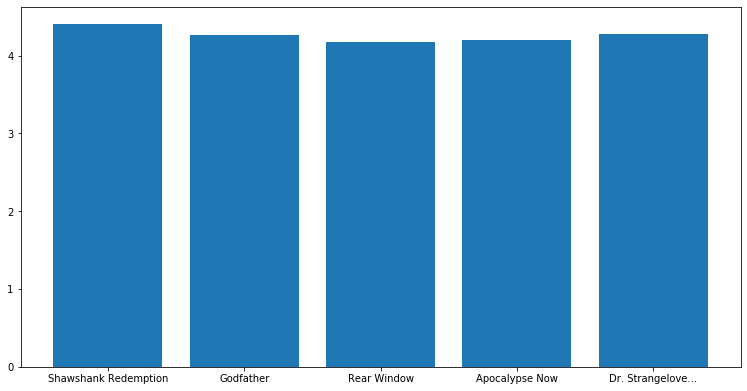

In [56]:
labels = ('Shawshank Redemption', 'Godfather', 'Rear Window', 'Apocalypse Now', 'Dr. Strangelove...')
sizes = movies_estimation

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, sizes)
plt.show()

In [57]:
#filmes tail
tail_movies = [374, 1556, 1499, 3593, 5323]
movie_array = []
movies_estimation = []

for index, j in enumerate(tail_movies):
    media = 0
    for i in unique_ids:
        media += base_line.predict(i, j).est
    movie_array.append(media/size_of_users)
    
for i in movie_array:
    movies_estimation.append(i[0])

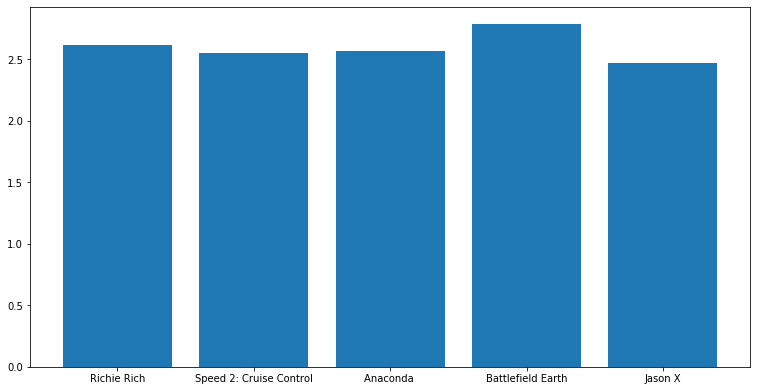

In [58]:
labels = ('Richie Rich', 'Speed 2: Cruise Control', 'Anaconda ', 'Battlefield Earth', 'Jason X')
sizes = movies_estimation

fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, sizes)
plt.show()